# One-Hot Encoding for Labels - Logistic Regression

Using one-vs-rest (OvR) scheme 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('logistic_reg_labels.csv')
df.head(10)

,x1,x2,label
0,52.391513,107.483053,B
1,27.140204,109.209526,B
2,62.585840,-50.368880,C
3,-44.273343,0.272521,A
4,61.132981,-42.934972,C
5,66.426433,-37.689998,C
6,-54.882594,-1.364713,A
7,56.925126,-59.311140,C
8,-57.480599,2.133231,A
9,63.250653,-56.675013,C


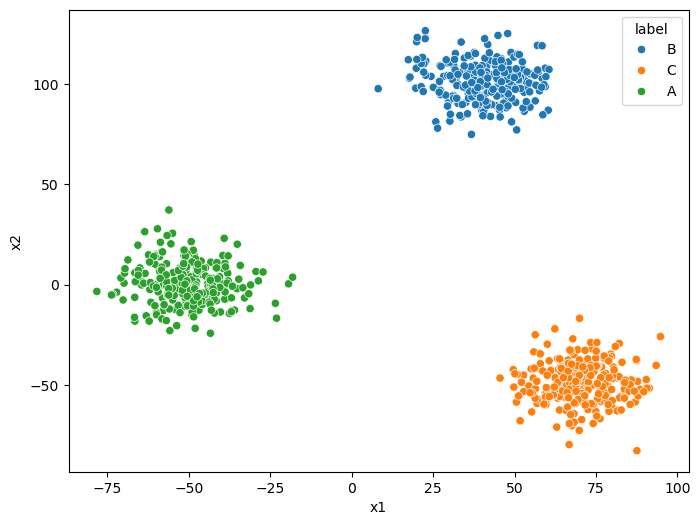

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label']);

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
X = df[['x1','x2']].to_numpy()
X[:10]

array([[ 52.39151314, 107.48305254],
       [ 27.14020392, 109.20952648],
       [ 62.58584   , -50.36887977],
       [-44.27334325,   0.27252127],
       [ 61.13298135, -42.93497207],
       [ 66.42643283, -37.6899983 ],
       [-54.88259445,  -1.36471304],
       [ 56.9251256 , -59.31113993],
       [-57.48059858,   2.13323064],
       [ 63.25065268, -56.67501269]])

In [7]:
y = df['label'].to_numpy()
y[:10]

array(['B', 'B', 'C', 'A', 'C', 'C', 'A', 'C', 'A', 'C'], dtype=object)

In [8]:
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

In [9]:
reg.coef_

array([[-0.23097904, -0.01050259],
       [ 0.07971867,  0.09003002],
       [ 0.15126037, -0.07952743]])

In [10]:
reg.intercept_

array([ 0.01164669, -0.00996   , -0.00168668])

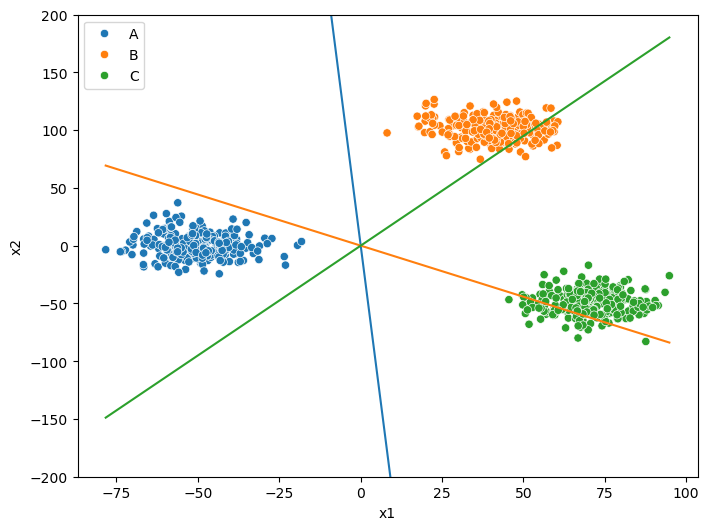

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'],hue_order=['A','B','C'])
for i in range(3):
    theta0 = reg.intercept_[i]
    theta1 = reg.coef_[i,0]
    theta2 = reg.coef_[i,1]
    x2 = -(theta0+theta1*df['x1'])/theta2
    sns.lineplot(x=df['x1'],y=x2)
plt.ylim((-200,200));

In [15]:
reg.predict([[25,0]]) # Melyik osztály

array(['C'], dtype=object)

In [16]:
reg.predict_proba([[25,0]]) # Valsége

array([[0.1688873, 0.0242981, 0.8068146]])